# Challenge: working with NISQ Devices


Quantum computers have important potential applications in multiple areas as are chemistry, machine learning, optimization, etc. But there exists a problem that is not mentioned at the moment you start working with a quantum processing unit (QPU): a large amount of noise and a limited number of qubits. 

Multiple companies work around quantum computers and algorithms but, on this challenge, we are focusing on the final step when your algorithm has been implemented on a real QPU and you need to mitigate errors. This will be possible using Mitiq, a multiplatform package focused on error mitigation. If you want to know more about this package you can check the following link https://mitiq.readthedocs.io/en/stable/



## The problem

Imagine you are working for a quantum computing company, and your role is to find the possibility to implement a quantum algorithm on QPUs. The first step is coding the following pseudocode in your favourite framework.   

<div style="background-color:#FFFF00; padding:10px 0;font-family:monospace;">
<font color = "blue"><b>def draper_adder(n:int, n1:int, n2:int):</b></font><br>
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#0037ffff">     “”” <br>
    &nbsp;&nbsp;&nbsp;&nbsp; n : integer value that is the number of qubits.<br>
    &nbsp;&nbsp;&nbsp;&nbsp; n1: integer value that is the first value for the adder.<br>
    &nbsp;&nbsp;&nbsp;&nbsp; n2: integer value that is the secod value for the adder.<br>
    &nbsp;&nbsp;&nbsp;&nbsp; Return the quantum circuit<br>
    &nbsp;&nbsp;&nbsp;&nbsp;     “””</font>  <br>    
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "blue"><b>input </b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; $X_{basis_1} = X(n_1) $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $X_{basis_2} = X(n_2) $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $H_{init} = X_{basis_1}^{n} + X_{basis_2}^{n} $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $H_{init} = I^{n} + QFT^{n} $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $|X\rangle|Y\rangle = |00...0\rangle_{n}|00...0\rangle_{n}$ <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; $|\psi_1 \rangle = H_{init}|X\rangle|Y\rangle$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "blue"><b>procedure </b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>for </b></font>$i \in  \{1,2,...,n\}$ <font color = "#ff0000ff"><b></b>do</font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>for </b></font>$j \in  \{0,1,...,n\}$ <font color = "#ff0000ff"><b></b>do</font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $|\psi_2\rangle=CP(\frac{\pi}{2^{i}},j)|\psi_1\rangle$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>end for</b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>end for</b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; $H_{out} = I^{n} + QFT^{\dagger n} $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $|\psi_3 \rangle = H_{out}|\psi_2 \rangle$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#00b400ff"><b>return  </b></font>Circuit producing $\langle Y|\psi_3 \rangle$ <br>
    
    
        
</div>
        
    

The general quantum algorithm scheme you can find in Figure 1. For example, if you want to do 5+ 2 you need 6 qubits in total, 3 for the state |101> that is 5, and |010> that is 2 in the basis encoding. The result is 7 and, therefore, final state when you measure the quantum circuit must be |111> (wihtout noise). 


![Draper adder](images/draper_adder.png)
<center>Figure 1. General quantum circuit to Draper adder </center>


### Resources

For some guidelines regarding the quantum algorithm, you can check the following sources, including the original paper explaining this idea, as well as some tutorials from different frameworks.

[1]Draper, Thomas. (2000). Addition on a Quantum Computer [[0008033]](https://arxiv.org/abs/quant-ph/0008033).

[2] [Qiskit Code](https://qiskit.org/documentation/stubs/qiskit.circuit.library.DraperQFTAdder.html).

[3] [Qiskit Application](https://github.com/qiskit-community/ibm-quantum-challenge-fall-2021/blob/main/solutions-by-authors/challenge-4/challenge-4.ipynb)

[4] [Pennylane Tutorial](https://pennylane.ai/qml/demos/tutorial_qft_arithmetics.html)

[5] [Q# Tutorial](https://learn.microsoft.com/en-us/azure/quantum/user-guide/libraries/standard/algorithms)


In [1]:
# code of your proposal for draper adder
from qiskit import *
import numpy as np
from qiskit.circuit.library import QFT


def basis_encoding(n:int,value:int) -> QuantumCircuit:
    qc = QuantumCircuit(n)

    for i,j in enumerate(np.binary_repr(value,width=n)):
        if j == '1':
            qc.x(n-i-1)

    return qc.to_gate(label = "["+str(value)+"]")


def draper_adder(n:int, n1:int, n2:int) -> QuantumCircuit:
    """
     n : integer value that is the number of qubits.
     n1: integer value that is the first value for the adder.
     n2: integer value that is the second value for the adder.
     Return the quantum circuit
    """
    #quantum circuit
    val1 = QuantumRegister(n)
    val2 = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(val1,val2,cr)
    
    ## implementation of the draper adder consider n qubits for the basis encoding
    qc.append(basis_encoding(n,n1),val1)
    qc.append(basis_encoding(n,n2),val2)
    
    qc = qc.compose(QFT(num_qubits=n,inverse=False,name='QFT').to_gate(),val2 )


    for j in range(n):
        for k in range(n - j):
            lam = np.pi / (2**k)
            qc.cp(lam, val1[n-j-1], val2[n-j-k-1])
            
            
    qc = qc.compose(QFT(num_qubits=n,inverse=True,name='QFT_inverse').to_gate(),val2 )

    
    qc.measure(val2,cr)
    return qc
    

In [2]:
draper_adder(3, 5, 2).draw()

┌──────┐                                                        »
q0_0: ┤0     ├──────────────────────────────────────────────────■─────»
      │      │                                                  │     »
q0_1: ┤1 [5] ├──────────────────────────────────■──────■────────┼─────»
      │      │                                  │      │        │     »
q0_2: ┤2     ├─────────■──────■────────■────────┼──────┼────────┼─────»
      ├──────┤┌──────┐ │      │        │P(π/4)  │      │P(π/2)  │P(π) »
q1_0: ┤0     ├┤0     ├─┼──────┼────────■────────┼──────■────────■─────»
      │      ││      │ │      │P(π/2)           │P(π)                 »
q1_1: ┤1 [2] ├┤1 QFT ├─┼──────■─────────────────■─────────────────────»
      │      ││      │ │P(π)                                          »
q1_2: ┤2     ├┤2     ├─■──────────────────────────────────────────────»
      └──────┘└──────┘                                                »
c0: 3/════════════════════════════════════════════════════════════════»
                                                                      »
«                               
«q0_0: ─────────────────────────
«                               
«q0_1: ─────────────────────────
«                               
«q0_2: ─────────────────────────
«      ┌──────────────┐┌─┐      
«q1_0: ┤0             ├┤M├──────
«      │              │└╥┘┌─┐   
«q1_1: ┤1 QFT_inverse ├─╫─┤M├───
«      │              │ ║ └╥┘┌─┐
«q1_2: ┤2             ├─╫──╫─┤M├
«      └──────────────┘ ║  ║ └╥┘
«c0: 3/═════════════════╩══╩══╩═
«                       0  1  2

## Ideal simulation

{'111': 1.0}


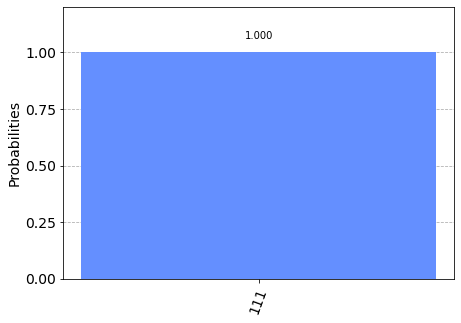

In [3]:
#consider the following example
qc = draper_adder(3, 5, 2)

# execute this in a simulator must be the output 7 or 111 with 100% of probability
######################
# your code here#
#################
from qiskit.visualization import *
shots = 20000
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()# the result of your simulation # the result of your simulation

for k in counts.keys():
    counts[k] /= shots

###################

result =  counts
print(result)
plot_histogram(result)

## Noisy Simulation

Add depolarizing noise with a probability of 0.02 in the simulation that you are working on. Try to execute your code and see if the output is the same or if instead the probability distribution in the output bitstring is different.

{'110': 0.0783, '100': 0.0449, '011': 0.15085, '000': 0.06115, '001': 0.0816, '111': 0.45555, '010': 0.04485, '101': 0.0828}


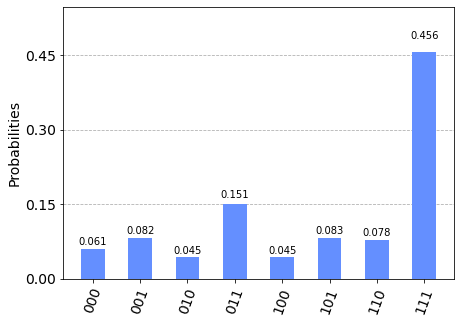

In [4]:
#consider the following example
qc = draper_adder(3, 5, 2)

# execute this in a noise simulator must be the output 7 or 111, but with a noise could be other states i nthe output.
######################
# your code here#
#################
from mitiq.interface.mitiq_qiskit.qiskit_utils import initialized_depolarizing_noise
noise_model = initialized_depolarizing_noise(noise_level=0.02)

###################

counts =  execute(qc.decompose().decompose(),Aer.get_backend('qasm_simulator'),
                  shots=20000,            
                  noise_model=noise_model,
                  basis_gates=noise_model.basis_gates,
            optimization_level=0).result().get_counts()# the result of your simulation # the result of your simulation

for k in counts.keys():
    counts[k] /= shots
##############
result = counts

print(result)
plot_histogram(result)

In [5]:
"Depth of quantum circuit",qc.decompose().decompose().depth()

('Depth of quantum circuit', 33)

## Using Mitiq
At this point, you need to use Zero noise Extrapolation (ZNE) and obtain a result which is closer to the ideal result. For that, you need to scale up the noise level by applying _unitary folding_  to your quantum circuit such that you can estimate the error-mitigated result via different extrapolation methods: linear, polynomial, exponential, and Richardson. You can find a guide for applying ZNE with Mitiq [here](https://mitiq.readthedocs.io/en/stable/guide/zne.html) and you can find additional examples [here](https://mitiq.readthedocs.io/en/stable/examples/examples.html) .

In [6]:
from mitiq import zne
from mitiq.zne.scaling import fold_global

qc = draper_adder(3, 5, 2)

def ibm_executor(circuit: QuantumCircuit, shots: int = 20000) -> float:
    """Returns the expectation value to be mitigated.

    Args:
        circuit: Circuit to run.
        shots: Number of times to execute the circuit to compute the expectation value.
    """
    # Simulate the circuit with noise
    job = execute(
        experiments=circuit,
        backend=Aer.get_backend("qasm_simulator"),
        noise_model=noise_model,
        basis_gates=noise_model.basis_gates,
        optimization_level=0,  # Important to preserve folded gates.
        shots=shots,
    )

    # Convert from raw measurement counts to the expectation value
    counts = job.result().get_counts()
    
    
    expectation_value = counts.get("111", 0.0) / shots
    return expectation_value



qc = qc.decompose().decompose()
decomposed = transpile(qc,
                       basis_gates=["u1", "u2", "u3", "cx"], 
                       optimization_level=0) 


print("Unmitigated result:", ibm_executor(qc))
###################
result = zne.execute_with_zne(decomposed, ibm_executor)
#result = # the result of your simulation
##############
print("Default ZNE result:", result)

scale_factors = [1, 2, 3]

## Linear Factory
linear_factory = zne.inference.LinearFactory(scale_factors=scale_factors)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=linear_factory, scale_noise=fold_global)
print("Linear ZNE result:", result)


## Exp Factory
exp_factory = zne.inference.ExpFactory(scale_factors=scale_factors, asymptote= 2**-3)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=exp_factory, scale_noise=fold_global)
print("Exponential ZNE result:", result)


## Richardson Factory
richardson_factory = zne.inference.RichardsonFactory(scale_factors=scale_factors)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=richardson_factory, scale_noise=fold_global)
print("Richardson ZNE result:", result)



## Poly Factory
poly_factory = zne.inference.PolyFactory(scale_factors=scale_factors, order=2)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=poly_factory, scale_noise=fold_global)
print("Polynomial ZNE result:", result)

Unmitigated result: 0.46025
Default ZNE result: 0.7728500000000004
Linear ZNE result: 0.5773500000000003
Exponential ZNE result: 0.9118806789915396
Richardson ZNE result: 0.8026500000000004
Polynomial ZNE result: 0.7804500000000003


As you can see, error mitigation slightly increases the probability of the correct result "111". However, since the noise is very large, even the error-mitigated expectation values are quite far from the ideal result which is 1.

This fact shows that, error mitigation can be very effective to mitigate weak levels of noise but it can have bad performances if the noise is too large. In particular, if the noise is so strong to destroy any signal of the ideal result, error mitigation may not work.

In the next section we try to simplify the draper_added algorithm itself, in order to obtain better results.

## Version 2 of Draper Adder circuit


Using the same process but we can reduce the depth and the number of gates using the following  changes:

<div style="background-color:#FFFF00; padding:10px 0;font-family:monospace;">
<font color = "blue"><b>def draper_adder(n:int, n1:int, n2:int):</b></font><br>
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#0037ffff">     “”” <br>
    &nbsp;&nbsp;&nbsp;&nbsp; n : integer value that is the number of qubits.<br>
    &nbsp;&nbsp;&nbsp;&nbsp; n1: integer value that is the first value for the adder.<br>
    &nbsp;&nbsp;&nbsp;&nbsp; n2: integer value that is the secod value for the adder.<br>
    &nbsp;&nbsp;&nbsp;&nbsp; Return the quantum circuit<br>
    &nbsp;&nbsp;&nbsp;&nbsp;     “””</font>  <br>    
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "blue"><b>input </b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; $X_{basis_1} = X(n_1) $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $X_{basis_2} = X(n_2) $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $H_{init} = X_{basis_1}^{n} + X_{basis_2}^{n} $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $H_{init} = I^{n} + QFT^{n} $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $|X\rangle|Y\rangle = |00...0\rangle_{n}|00...0\rangle_{n}$ <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; $|\psi_1 \rangle = H_{init}|X\rangle|Y\rangle$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "blue"><b>procedure </b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>for </b></font>$j \in  \{1,2,...,n\}$ <font color = "#ff0000ff"><b></b>do</font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; k = 0 <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>for </b></font>$j \in  \{n-1-j,...,0\}$ <font color = "#ff0000ff"><b></b>do</font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $|\psi_2\rangle=CP(\frac{n_2 *\pi}{2^{i}},j,k)|\psi_1\rangle$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>end for</b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#ff0000ff"><b>end for</b></font><br>   
    &nbsp;&nbsp;&nbsp;&nbsp; $H_{out} = I^{n} + QFT^{\dagger n} $ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; $|\psi_3 \rangle = H_{out}|\psi_2 \rangle$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <font color = "#00b400ff"><b>return </b></font>$\langle Y|\psi_3 \rangle$ <br>
    
</div>
        

You can find the quantum circuit of this new version in Figure 2. 

![Draper adder](images/draper_adder_v2.png)
<center>Figure 1. General quantum circuit to Draper adder version 2. </center>

Now you can apply the previous process to generate the circuit for simulation, run it without and with depolarizing noise, and mitigate the results.


### Simulation

In [7]:
# code of your proposal for draper adder

def draper_adder_v2(n:int, n1:int, n2:int):
    """
     n : integer value that is the number of qubits.
     n1: integer value that is the first value for the adder.
     n2: integer value that is the second value for the adder.
     Return the quantum circuit
    """
        
    #quantum circuit
    val1 = QuantumRegister(n)
    val2 = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(val1,val2,cr)
    
    ## implementation of the draper adder consider n qubits for the basis encoding
    
    #qc.append(basis_encoding(n,n1),val1)
    qc.x(val1)
    qc.append(basis_encoding(n,n2),val2)
    
    #qc.h(val2)
    qc = qc.compose(QFT(num_qubits=n,inverse=False,name='QFT').to_gate(),val2 )

    
    for j in range(n):
        lam = n1*np.pi / (2**(n-j-1))
        qc.cp(lam, val1[j], val2[j])
        #qc.p(lam, val2[j])
            
    
    #qc.append(QFT(n, inverse=True, name='QFT_inverse').to_gate(), val2 )
    qc = qc.compose(QFT(num_qubits=n,inverse=True,name='QFT_inverse').to_gate(),val2)

    
    qc.measure(val2,cr)
    return qc
    

In [8]:
qc = draper_adder_v2(3, 5, 2)
qc.draw()

┌───┐                                                               
q104_0: ─┤ X ├───────────■───────────────────────────────────────────────────
         ├───┤           │                                                   
q104_1: ─┤ X ├───────────┼─────────■─────────────────────────────────────────
         ├───┤           │         │                                         
q104_2: ─┤ X ├───────────┼─────────┼─────────■───────────────────────────────
        ┌┴───┴─┐┌──────┐ │P(5π/4)  │         │      ┌──────────────┐┌─┐      
q105_0: ┤0     ├┤0     ├─■─────────┼─────────┼──────┤0             ├┤M├──────
        │      ││      │           │P(5π/2)  │      │              │└╥┘┌─┐   
q105_1: ┤1 [2] ├┤1 QFT ├───────────■─────────┼──────┤1 QFT_inverse ├─╫─┤M├───
        │      ││      │                     │P(5π) │              │ ║ └╥┘┌─┐
q105_2: ┤2     ├┤2     ├─────────────────────■──────┤2             ├─╫──╫─┤M├
        └──────┘└──────┘                            └──────────────┘ ║  ║ └╥┘
  c4: 3/═════════════════════════════════════════════════════════════╩══╩══╩═
                                                                     0  1  2

In [9]:
#consider the following example
qc = draper_adder_v2(3, 5, 2)

# execute this in a simulator must be the output 7 or 111 with 100% of probability
######################
# your code here#
#################
###################

result =  execute(qc,Aer.get_backend('qasm_simulator'),shots=20000).result().get_counts() #the result of your simulation
##############
print(result)

{'111': 20000}


### Noisy simulation

Using the same parameter for the noise model

{'000': 0.0663, '001': 0.06665, '100': 0.0438, '110': 0.07485, '011': 0.1158, '111': 0.51475, '010': 0.0457, '101': 0.07215}


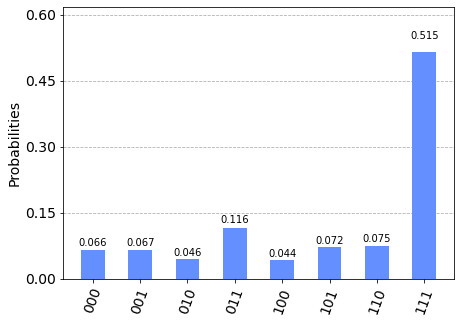

In [10]:
#consider the following example
qc = draper_adder_v2(3, 5, 2)

# execute this in a noise simulator must be the output 7 or 111, but with a noise could be other states i nthe output.
######################
# your code here#
#################


counts =  execute(qc.decompose().decompose(),Aer.get_backend('qasm_simulator'),
                  shots=20000,            
                  noise_model=noise_model,
                  basis_gates=noise_model.basis_gates,
            optimization_level=0).result().get_counts()# the result of your simulation # the result of your simulation

for k in counts.keys():
    counts[k] /= shots
##############
result = counts

print(result)
plot_histogram(result)

In [11]:
"Depth of quantum circuit",qc.decompose().decompose().depth()

('Depth of quantum circuit', 17)

## Using Mitiq

Use the same proccess and the same four functions: linear, polynomial, exponential and Richardson to find the best fit for the mitigation error.

In [12]:
qc = draper_adder_v2(3, 5, 2)


qc = qc.decompose().decompose()
decomposed = transpile(qc,
                       basis_gates=["u1", "u2", "u3", "cx"], 
                       optimization_level=0) 


print("Unmitigated result:", ibm_executor(qc))
###################
result = zne.execute_with_zne(decomposed, ibm_executor)
#result = # the result of your simulation
##############
print("Default ZNE result:", result)

scale_factors = [1, 2, 3]

## Linear Extrapolation
linear_factory = zne.inference.LinearFactory(scale_factors=scale_factors)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=linear_factory, scale_noise=fold_global)
print("Linear ZNE result:", result)

## Exp Extrapolation
exp_factory = zne.inference.ExpFactory(scale_factors=scale_factors, asymptote=2**-3)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=exp_factory, scale_noise=fold_global)
print("Exponential ZNE result:", result)

## Richardson Extrapolation
richardson_factory = zne.inference.RichardsonFactory(scale_factors=scale_factors)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=richardson_factory, scale_noise=fold_global)
print("Richardson ZNE result:", result)

## Poly Extrapolation
poly_factory = zne.inference.PolyFactory(scale_factors=scale_factors, order=2)
result = zne.execute_with_zne(decomposed, ibm_executor, factory=poly_factory, scale_noise=fold_global)
print("Polynomial ZNE result:", result)

Unmitigated result: 0.52245
Default ZNE result: 0.8171500000000002
Linear ZNE result: 0.6503500000000001
Exponential ZNE result: 0.9478302877580596
Richardson ZNE result: 0.8536000000000002
Polynomial ZNE result: 0.8560500000000003


## Bonus

If you completed the notebook and to arrived at this point, congratulations! You did a great job on learning how to obtain better results on your quantum circuit executed on a QPU. Remember that you need an account on qBraid and send us a DM to share the credits and to use a real QPU. You can consider and try to contribute to an important part of the quantum community working in the field of quantum noise and error mitigation 😊